In [41]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import LabelEncoder

In [6]:
bd_treino = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/refs/heads/main/titanic_train.csv')

In [7]:
bd_treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [4]:
bd_treino.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


# Informação dos atributos

In [8]:
bd_treino.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


# Exemplos de pré-processamento

Verificar a quantidade de valores nulos para cada atributo.
Após fazer a operação abaixo, você verá que os atributos "Age", "Cabin", "Embarked" possuem valores nulos.

In [9]:
np.sum(bd_treino.isna())

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

De 891 linhas, vimos que o atributo "Cabin" possui 687 campos. Como esse atributo possui a maioria dos seus campos vazios e provavelmente não faria diferença a sua análise, então removemos ela

In [10]:
bd_treino.drop(labels=['Cabin'], axis = 1, inplace = True)

Ver todos os valores únicos para o atributo "Embarked"

In [11]:
bd_treino['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

Para lidarmos com os valores nulos no atributo "Embarked", podemos utilizar o valor da moda

In [12]:
moda = bd_treino['Embarked'].mode()[0]
bd_treino['Embarked'].fillna(moda, inplace = True)

Ao executar a linha abaixo, verás que ainda tem um atributo com valores nulos

In [13]:
np.sum(bd_treino.isna())

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Embarked         0
dtype: int64

Para o atributo 'Age', podemos remover as linhas nulas. Como apenas 'Age' contém valores nulos, então podemos fazer a remoção de apenas linhas em que 'Age' possua valor nulo

In [14]:
bd_treino = bd_treino.dropna()

Também podemos discretizar o atributo Sex

In [15]:
bd_treino['Sex'].replace({'male': 0, 'female': 1}, inplace = True)

Alguns algoritmos de regressão ou de classificação não suportam atributos do tipo string (simbólico). Em outras palavras, devemos também preprocessar o atributo 'Embarked', no qual, cada elemento contém um dos seguintes valores: 'S', 'C' e 'Q'.

A seguir é apresentada a transformação do atributo 'Embarked' em três outros do tipo binário.

In [16]:
bd_treino = pd.get_dummies(bd_treino, columns = ['Embarked'])
bd_treino.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked_C', 'Embarked_Q', 'Embarked_S'],
      dtype='object')

Outra possibilidade seria a remoção dos atributos 'SibSp', 'Parch', 'Ticket',  'PassengerId' e 'Name', pois esses atributos podem ser desconsiderados para a extração de padrões.

In [17]:
bd_treino.drop(labels=['SibSp', 'Parch', 'Ticket', 'PassengerId', 'Name', 'Survived'], axis = 1, inplace = True)

Agora podemos obter algumas informações interessantes

<AxesSubplot: >

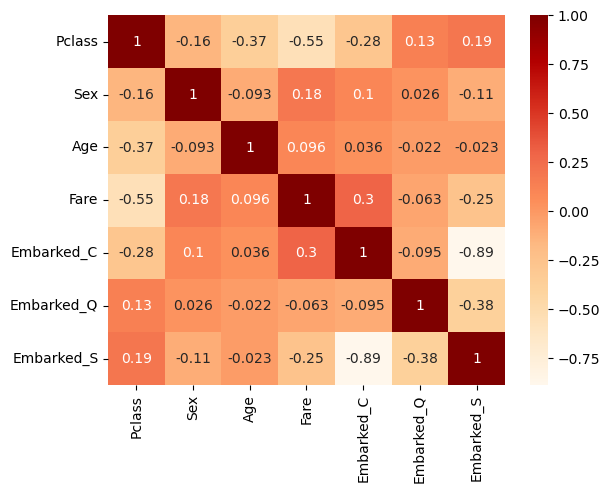

In [18]:
plt.figure(dpi=100)
sns.heatmap(bd_treino.corr(), annot=True, cmap='OrRd')

O próximo passo é a transformação de dados para a próxima aplicação, que será regressão linear.

O primeiro passo é carregar a base de teste.

In [19]:
bd_teste = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/refs/heads/main/titanic_test.csv')

bd_teste também deve ser pré-processada.

In [20]:
bd_teste.drop(labels=['Cabin', 'SibSp', 'Parch', 'Ticket', 'PassengerId', 'Name'], axis = 1, inplace = True)

moda = bd_teste['Embarked'].mode()[0]

bd_teste['Embarked'].fillna(moda, inplace = True)
bd_teste['Sex'].replace({'male': 0, 'female': 1}, inplace = True)
bd_teste = pd.get_dummies(bd_teste, columns = ['Embarked'])

np.sum(bd_teste.isna())

/usr/lib/python3/dist-packages/numpy/core/fromnumeric.py:86: FutureWarning: The behavior of DataFrame.sum with axis=None is deprecated, in a future version this will reduce over both axes and return a scalar. To retain the old behavior, pass axis=0 (or do not pass axis)
  return reduction(axis=axis, out=out, **passkwargs)


Pclass         0
Sex            0
Age           86
Fare           1
Embarked_C     0
Embarked_Q     0
Embarked_S     0
dtype: int64

Ao aplicar o comando acima, veremos que no atributo 'Fare' tem um 1 exemplo nulo. Então, nesse caso iremos substituir o valor nulo pela mediana do atributo.

In [23]:
mediana = bd_teste['Fare'].median()
bd_teste['Fare'].fillna(mediana, inplace = True)

bd_teste = bd_teste.dropna()

## Outras implementações relacionadas ao pré-processamento

#### Normalização Min-Max 

- Re-escala o atributo X para valores entre [0, 1]:

$$x^{[i]}_{\text{norm}} = \frac{x^{[i]} - x_{\text{min}} }{ x_{\text{max}} - x_{\text{min}} }$$

In [33]:
x = np.arange(1, 21).astype(float)
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [34]:
x_mm = (x - x.min()) / (x.max() - x.min())
x_mm

array([0.        , 0.05263158, 0.10526316, 0.15789474, 0.21052632,
       0.26315789, 0.31578947, 0.36842105, 0.42105263, 0.47368421,
       0.52631579, 0.57894737, 0.63157895, 0.68421053, 0.73684211,
       0.78947368, 0.84210526, 0.89473684, 0.94736842, 1.        ])

#### Padronização z-score

- Transforma atributo de forma que os seus valores possuam a média igual a zero e o desvio-padrão igual a 1 ($N(\mu=0, \sigma^2=1)$)

$$x^{[i]}_{\text{std}} = \frac{x^{[i]} - \mu_x }{ \sigma_{x} }$$

In [35]:
x = np.arange(1, 21).astype(float)
x

array([ 1.,  2.,  3.,  4.,  5.,  6.,  7.,  8.,  9., 10., 11., 12., 13.,
       14., 15., 16., 17., 18., 19., 20.])

In [36]:
x_std = (x - x.mean()) / x.std()
x_std

array([-1.64750894, -1.47408695, -1.30066495, -1.12724296, -0.95382097,
       -0.78039897, -0.60697698, -0.43355498, -0.26013299, -0.086711  ,
        0.086711  ,  0.26013299,  0.43355498,  0.60697698,  0.78039897,
        0.95382097,  1.12724296,  1.30066495,  1.47408695,  1.64750894])

#### Desvio-padrão: Pandas vs. Numpy

- A função std da Pandas calcula o desvio-padrão "amostral" ($s_x$)

- A função std da Numpy Calcula o desvio-padrão "populacional" ($\sigma_x$)

$$s_x = \sqrt{ \frac{1}{n-1} \sum^{n}_{i=1} (x^{[i]} - \bar{x})^2 }$$

$$\sigma_x = \sqrt{ \frac{1}{n} \sum^{n}_{i=1} (x^{[i]} - \mu_x)^2 }$$

In [37]:
df = pd.DataFrame([1, 2, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12])
df[0].std()

3.786180771590923

In [38]:
df[0].values.std()

3.6484550826063242

## Dados categóricos

In [39]:
data = pd.read_csv('https://raw.githubusercontent.com/jefferson-oliva/databases/refs/heads/main/categoricaldata.csv')
data

,color,size,price,classlabel
0,green,M,10.1,class1
1,red,L,13.5,class2
2,blue,XXL,15.3,class1


In [40]:
dic = {'M': 2, 'L': 3, 'XXL': 5}

data['size'] = data['size'].map(dic)
data

,color,size,price,classlabel
0,green,2,10.1,class1
1,red,3,13.5,class2
2,blue,5,15.3,class1


In [ ]:
le = LabelEncoder()
data['classlabel'] = le.fit_transform(df['classlabel'])
data